In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import VAR
from pandas.plotting import register_matplotlib_converters

from datetime import datetime 

In [2]:
values = pd.read_csv("../data/kalshi_features_v1.csv")
values.shape

(1565, 32)

In [3]:
values.head()

Date  DayOfWeek          Open          High           Low  \
0  2023-11-10          5  15252.360352  15535.200195  15237.169922   
1  2023-11-09          4  15351.120117  15382.110352  15171.320313   
2  2023-11-08          3  15313.900391  15343.190430  15220.879883   
3  2023-11-07          2  15201.769531  15335.440430  15153.309570   
4  2023-11-06          1  15137.160156  15180.190430  15064.910156   

          Close     Adj Close      Volume  OC Difference  HL Difference  ...  \
0  15529.120117  15529.120117  4722140000    -276.759765     298.030273  ...   
1  15187.900391  15187.900391  5313970000     163.219726     210.790039  ...   
2  15313.240234  15313.240234  4685550000       0.660157     122.310547  ...   
3  15296.019531  15296.019531  4354460000     -94.250000     182.130860  ...   
4  15154.929688  15154.929688  4345850000     -17.769532     115.280274  ...   

    Close_Lag_5   Close_Lag_4   Close_Lag_3   Close_Lag_2   Close_Lag_1  \
0  15099.490234  15154.929688  15296.019531  15313.240234  15187.900391   
1  14919.549805  15099.490234  15154.929688  15296.019531  15313.240234   
2  14664.910156  14919.549805  15099.490234  15154.929688  15296.019531   
3  14409.780273  14664.910156  14919.549805  15099.490234  15154.929688   
4  14335.509766  14409.780273  14664.910156  14919.549805  15099.490234   

       ShortEMA       LongEMA       MACD  SignalLine  MACD_Histogram  
0  15529.120117  15529.120117   0.000000    0.000000        0.000000  
1  15476.624775  15503.844582 -27.219807   -5.443961      -21.775846  
2  15451.488691  15489.725741 -38.237050  -12.002579      -26.234471  
3  15427.570359  15475.377133 -47.806774  -19.163418      -28.643356  
4  15385.625640  15451.640285 -66.014645  -28.533663      -37.480981  

[5 rows x 32 columns]

# Time Series

#### Problem Statement
**We aim to forecast future stock market Open and Close prices based on historical data. The objectives are two-fold:**
1) Predict the Open and Close prices for the next few days based on previous price data and other related financial indicators.
2) Given only the Open price for a future date, predict the corresponding Close price.

#### Steps to Take
1. Data Preprocessing
2. EDA (If Needed)
3. Model Selection
4. Feature Selection
5. Evaluation

## Data Preprocessing

In [4]:
values_ts = values

In [5]:
values_ts['Date'] = pd.to_datetime(values['Date'])

In [6]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1565 non-null   datetime64[ns]
 1   DayOfWeek               1565 non-null   int64         
 2   Open                    1565 non-null   float64       
 3   High                    1565 non-null   float64       
 4   Low                     1565 non-null   float64       
 5   Close                   1565 non-null   float64       
 6   Adj Close               1565 non-null   float64       
 7   Volume                  1565 non-null   int64         
 8   OC Difference           1565 non-null   float64       
 9   HL Difference           1565 non-null   float64       
 10  OC %Change              1565 non-null   float64       
 11  HL %Change              1565 non-null   float64       
 12  Close_Status            1565 non-null   int64   

In [7]:
values_ts.set_index('Date',inplace=True)

In [8]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1565 entries, 2023-11-10 to 2018-08-23
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DayOfWeek               1565 non-null   int64  
 1   Open                    1565 non-null   float64
 2   High                    1565 non-null   float64
 3   Low                     1565 non-null   float64
 4   Close                   1565 non-null   float64
 5   Adj Close               1565 non-null   float64
 6   Volume                  1565 non-null   int64  
 7   OC Difference           1565 non-null   float64
 8   HL Difference           1565 non-null   float64
 9   OC %Change              1565 non-null   float64
 10  HL %Change              1565 non-null   float64
 11  Close_Status            1565 non-null   int64  
 12  Close_Difference        1564 non-null   float64
 13  Same Bracket            1565 non-null   int64  
 14  Avg_OC_Spread_10_Day  

In [9]:
values_ts.sort_index(inplace=True)

## NEXT: WE NEED TO GET OUR DATA TO BECOME STATIONERY



## EDA


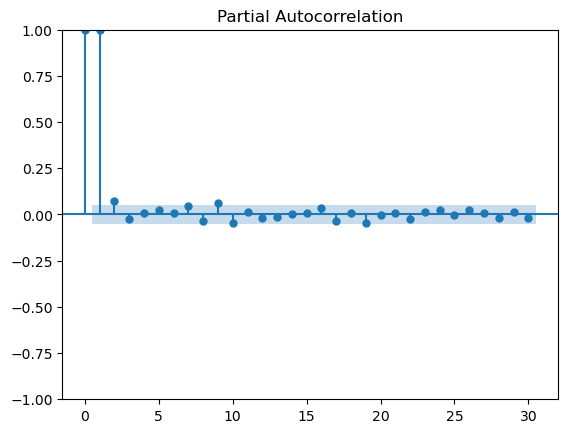

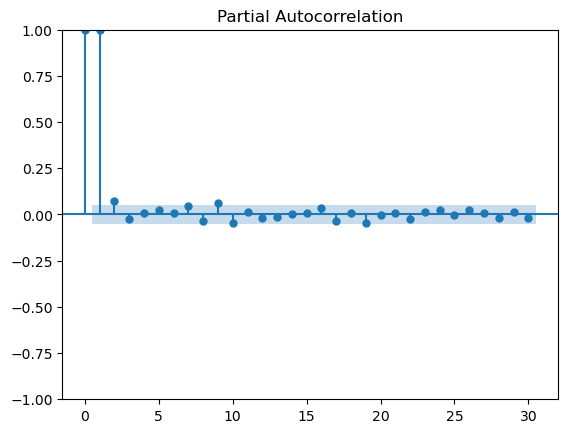

In [10]:
plot_pacf(values_ts['Close'],lags=30)

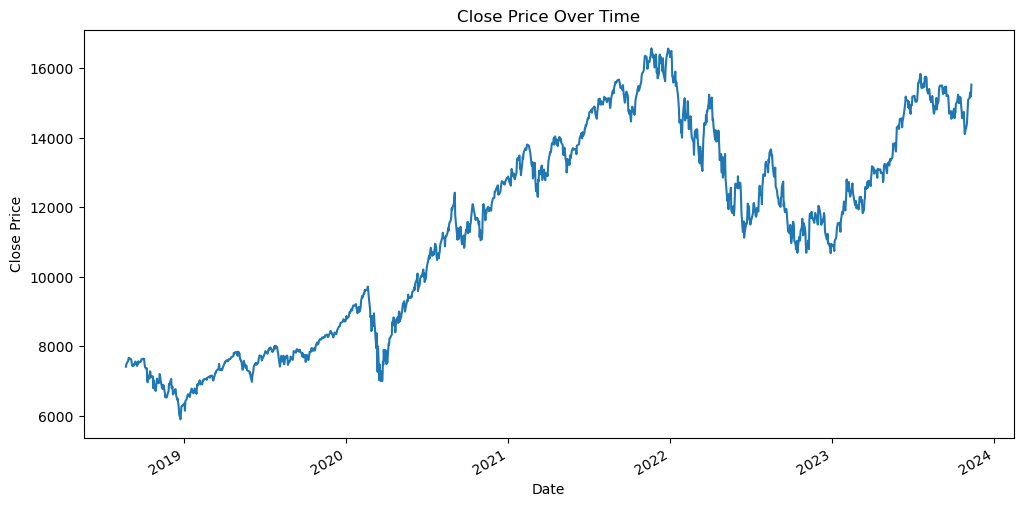

In [11]:
import matplotlib.pyplot as plt

# Plotting the 'Close' column
values_ts['Close'].plot(figsize=(12, 6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


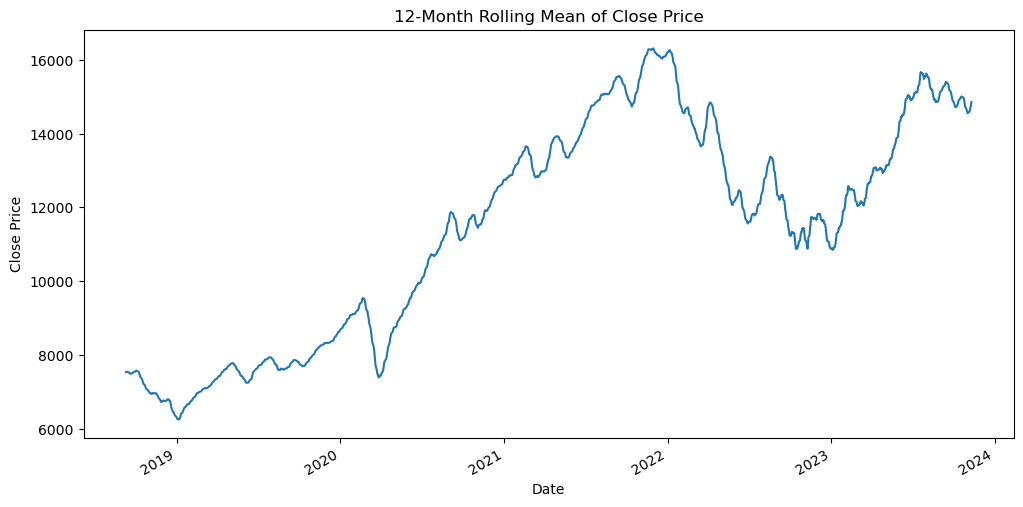

In [12]:
values_ts['Close'].rolling(window=12).mean().plot(figsize=(12, 6))
plt.title('12-Month Rolling Mean of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


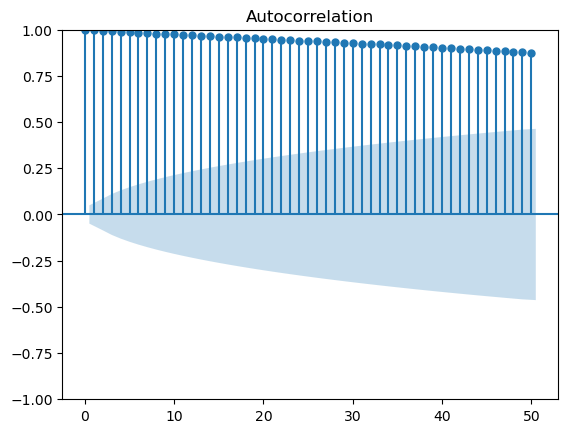

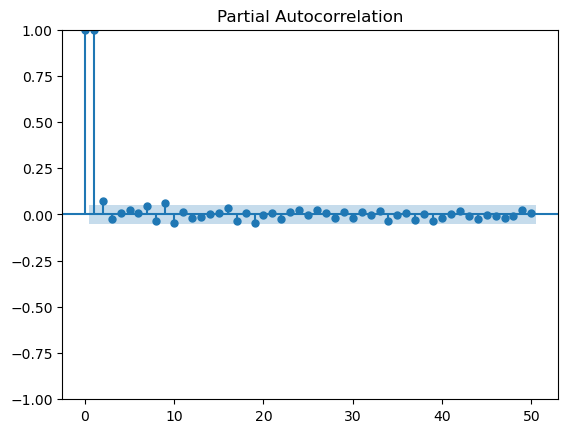

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(values_ts['Close'], lags=50)
plot_pacf(values_ts['Close'], lags=50)
plt.show()


In [14]:
values_ts['z_score'] = (values_ts['Close'] - values_ts['Close'].mean()) / values_ts['Close'].std()
anomalies = values_ts[abs(values_ts['z_score']) > 3]
anomalies

Empty DataFrame
Columns: [DayOfWeek, Open, High, Low, Close, Adj Close, Volume, OC Difference, HL Difference, OC %Change, HL %Change, Close_Status, Close_Difference, Same Bracket, Avg_OC_Spread_10_Day, Avg_Volume_10_Day, Volatility_10_Day, Price_Change_Magnitude, Price_Direction, MA_Volume_Ratio, Close_Bracket, Close_Lag_5, Close_Lag_4, Close_Lag_3, Close_Lag_2, Close_Lag_1, ShortEMA, LongEMA, MACD, SignalLine, MACD_Histogram, z_score]
Index: []

[0 rows x 32 columns]

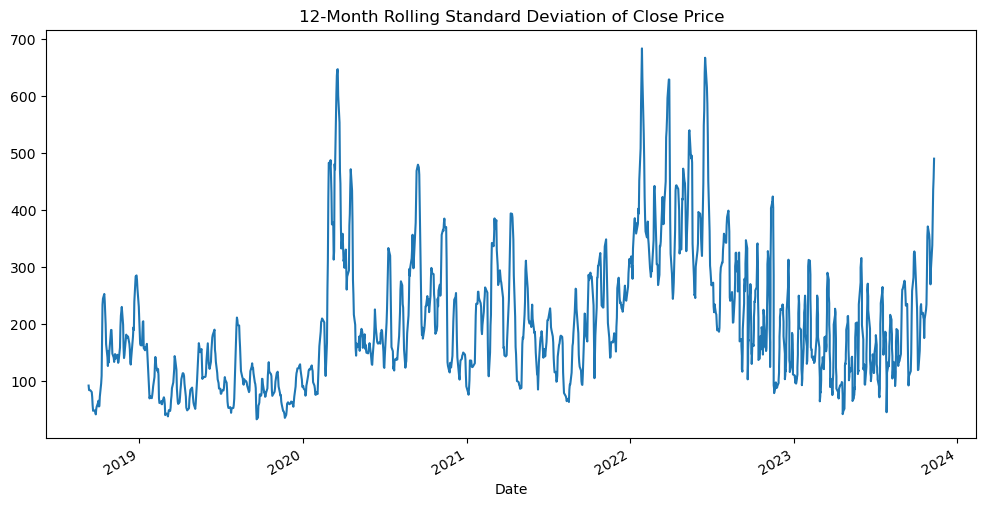

In [15]:
values_ts['Close'].rolling(window=12).std().plot(figsize=(12, 6))
plt.title('12-Month Rolling Standard Deviation of Close Price')
plt.show()


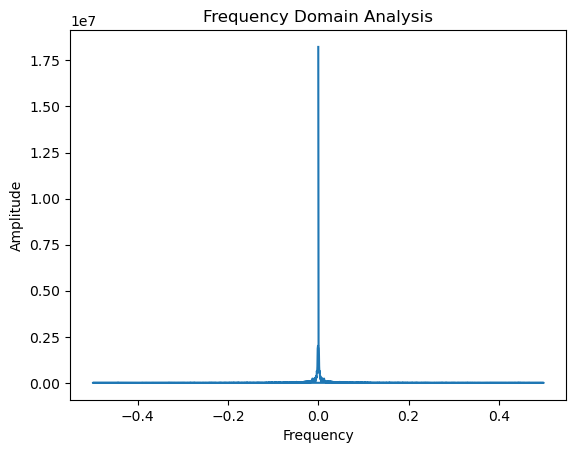

In [16]:
import numpy as np

fft_result = np.fft.fft(values_ts['Close'])
frequencies = np.fft.fftfreq(len(fft_result))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Analysis')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


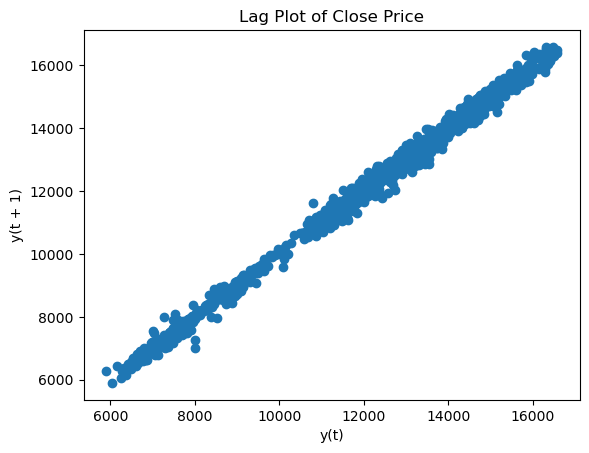

In [17]:
from pandas.plotting import lag_plot

lag_plot(values_ts['Close'])
plt.title('Lag Plot of Close Price')
plt.show()


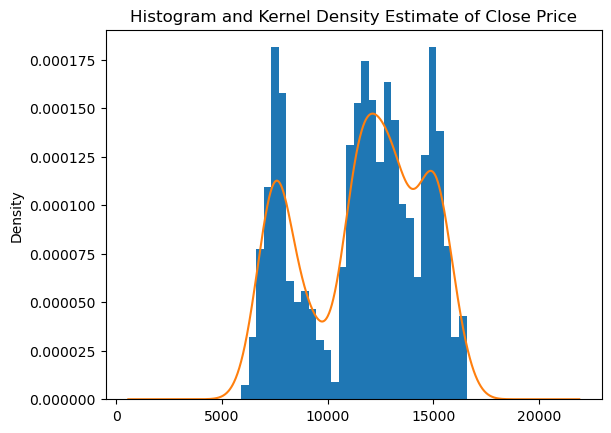

In [18]:
values_ts['Close'].plot(kind='hist', bins=30, density=True)
values_ts['Close'].plot(kind='kde')
plt.title('Histogram and Kernel Density Estimate of Close Price')
plt.show()


## Deep Dive: Relationship between Close and Volume

In [19]:
def crosscorr(datax, datay, lag=0, method='pearson'):
    """ Cross correlation at different lags """
    return datax.corr(datay.shift(lag), method=method)


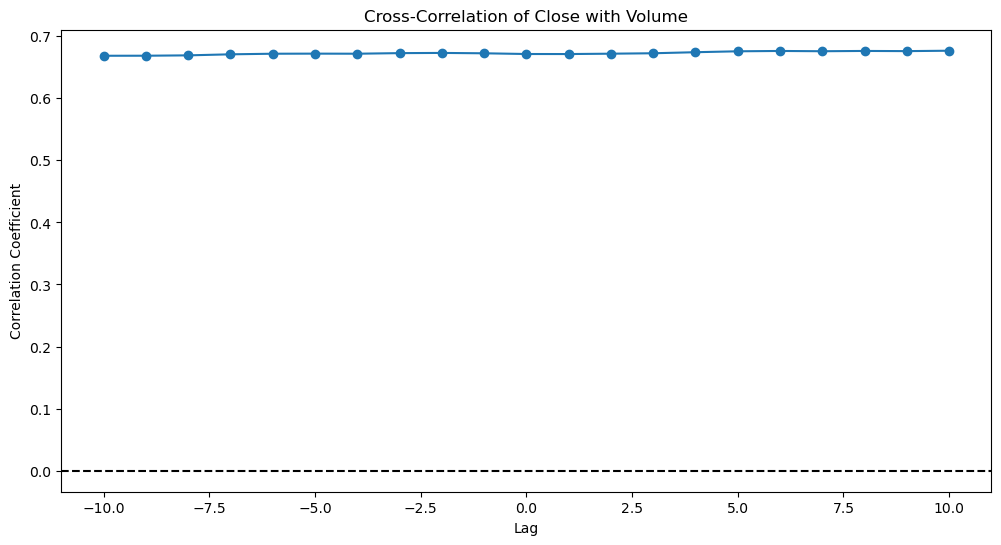

In [20]:
lags = range(-10, 11)  # for example, from -10 to +10 days
cross_corr_values = [crosscorr(values_ts['Close'], values_ts['Volume'], lag) for lag in lags]

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr_values, marker='o')
plt.axhline(y=0, linestyle='--', color='k')
plt.title('Cross-Correlation of Close with Volume')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.show()


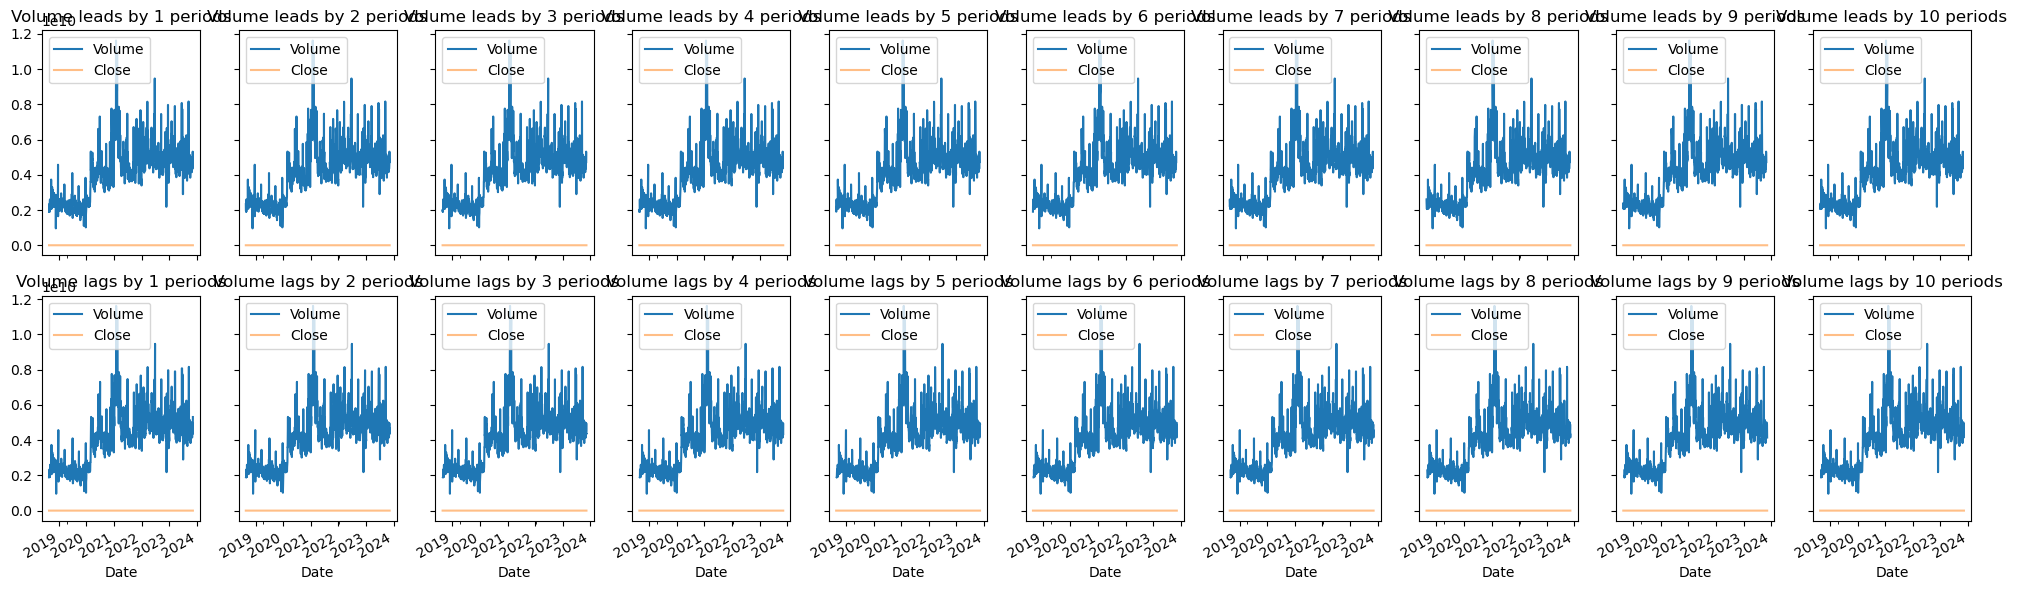

In [21]:
import matplotlib.pyplot as plt

# Assuming 'values_ts' is your DataFrame with 'Close' and 'Volume' columns
max_lag = 10
fig, axes = plt.subplots(2, max_lag, figsize=(20, 6), sharex=True, sharey=True)

# Check for volume leading close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(-lag).plot(ax=axes[0, i], title=f'Volume leads by {lag} periods')
    values_ts['Close'].plot(ax=axes[0, i], alpha=0.5)
    axes[0, i].legend(["Volume", "Close"])

# Check for volume lagging close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(lag).plot(ax=axes[1, i], title=f'Volume lags by {lag} periods')
    values_ts['Close'].plot(ax=axes[1, i], alpha=0.5)
    axes[1, i].legend(["Volume", "Close"])

plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test_result = grangercausalitytests(values_ts[['Close', 'Volume']], maxlag=max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7882  , p=0.3748  , df_denom=1561, df_num=1
ssr based chi2 test:   chi2=0.7898  , p=0.3742  , df=1
likelihood ratio test: chi2=0.7896  , p=0.3742  , df=1
parameter F test:         F=0.7882  , p=0.3748  , df_denom=1561, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8192  , p=0.1625  , df_denom=1558, df_num=2
ssr based chi2 test:   chi2=3.6502  , p=0.1612  , df=2
likelihood ratio test: chi2=3.6459  , p=0.1615  , df=2
parameter F test:         F=1.8192  , p=0.1625  , df_denom=1558, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4309  , p=0.2320  , df_denom=1555, df_num=3
ssr based chi2 test:   chi2=4.3119  , p=0.2297  , df=3
likelihood ratio test: chi2=4.3059  , p=0.2303  , df=3
parameter F test:         F=1.4309  , p=0.2320  , df_denom=1555, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8463  , p=0.

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### NOTE: It appears that the 2 day lag volume is pretty significant to the current close price

In [23]:
"""import statsmodels.api as sm

# Use a lag of your choice based on previous insights
lag = 5
X = values_ts[['Volume']].shift(lag)
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = values_ts['Close']

# Drop NaN values that were created by shifting
X.dropna(inplace=True)
y = y.loc[X.index]

model = sm.OLS(y, X).fit()
print(model.summary())
"""

"import statsmodels.api as sm\n\n# Use a lag of your choice based on previous insights\nlag = 5\nX = values_ts[['Volume']].shift(lag)\nX = sm.add_constant(X)  # Adds a constant term to the predictor\ny = values_ts['Close']\n\n# Drop NaN values that were created by shifting\nX.dropna(inplace=True)\ny = y.loc[X.index]\n\nmodel = sm.OLS(y, X).fit()\nprint(model.summary())\n"

## Data Prep

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
result = adfuller(values_ts['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -1.126104
p-value: 0.704551
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Series is not stationary


In [25]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

#### Close (Stationarity)

In [26]:
interpret_dftest(adfuller(values_ts['Close'].diff().dropna()))

Test Statistic   -1.314031e+01
p-value           1.433890e-24
dtype: float64

In [27]:
values_ts['first_diff_close'] = values_ts['Close'].diff()

#### Open (Stationarity)

In [28]:
interpret_dftest(adfuller(values_ts['Open'].diff().dropna()))

Test Statistic   -29.970001
p-value            0.000000
dtype: float64

In [29]:
values_ts['first_diff_open'] = values_ts['Open'].diff()

#### High (Stationarity)

In [30]:
interpret_dftest(adfuller(values_ts['High'].diff().dropna()))

Test Statistic   -35.700272
p-value            0.000000
dtype: float64

In [31]:
values_ts['first_diff_high'] = values_ts['High'].diff()

#### Low (Stationarity)

In [32]:
interpret_dftest(adfuller(values_ts['Low'].diff().dropna()))

Test Statistic   -34.956794
p-value            0.000000
dtype: float64

In [33]:
values_ts['first_diff_low'] = values_ts['Low'].diff()

#### Volume (Stationarity)

In [34]:
interpret_dftest(adfuller(values_ts['Volume'].diff().dropna()))

Test Statistic   -1.226443e+01
p-value           8.926687e-23
dtype: float64

In [35]:
values_ts['first_diff_volume'] = values_ts['Volume'].diff()

#### Avg Volume 10 Day (Statioanrity)

In [36]:
interpret_dftest(adfuller(values_ts['Avg_Volume_10_Day'].diff().dropna()))

Test Statistic   -8.471675e+00
p-value           1.471939e-13
dtype: float64

In [37]:
values_ts['first_diff_avg_volume_10_day'] = values_ts['Avg_Volume_10_Day'].diff()

#### Close Bracket (Stationarity)

In [38]:
interpret_dftest(adfuller(values_ts['Close_Bracket'].diff().dropna()))

Test Statistic   -1.320053e+01
p-value           1.096796e-24
dtype: float64

In [39]:
values_ts['first_diff_close_bracket'] = values_ts['Close_Bracket'].diff()

#### Short EMA (Stationarity)

In [40]:
interpret_dftest(adfuller(values_ts['ShortEMA'].diff().dropna()))

Test Statistic   -1.107796e+01
p-value           4.383885e-20
dtype: float64

In [41]:
values_ts['first_diff_short_ema'] = values_ts['ShortEMA'].diff()

#### Long EMA (Stationarity)

In [42]:
interpret_dftest(adfuller(values_ts['LongEMA'].diff().dropna()))

Test Statistic   -7.986280e+00
p-value           2.543914e-12
dtype: float64

In [43]:
values_ts['first_diff_long_ema'] = values_ts['LongEMA'].diff()

#### Close Lag 1 (Stationarity)

In [44]:
interpret_dftest(adfuller(values_ts['Close_Lag_1']))

MissingDataError: exog contains inf or nans

In [45]:
values_ts['first_diff_close_lag_1'] = values_ts['Close_Lag_1'].diff()

#### Close Lag 2 (Stationarity)

In [ ]:
interpret_dftest(adfuller(values_ts['Close_Lag_2']))

In [46]:
values_ts['first_diff_close_lag_2'] = values_ts['Close_Lag_2'].diff()

#### Close Lag 3 (Stationairty)

In [ ]:
interpret_dftest(adfuller(values_ts['Close_Lag_3']))

In [47]:
values_ts['first_diff_close_lag_3'] = values_ts['Close_Lag_3'].diff()

#### Close Lag 4 (Stationairty)

In [ ]:
interpret_dftest(adfuller(values_ts['Close_Lag_4']))

In [48]:
values_ts['first_diff_close_lag_4'] = values_ts['Close_Lag_4'].diff()

#### Close Lag 5 (Stationairty)

In [ ]:
interpret_dftest(adfuller(values_ts['Close_Lag_5']))

In [49]:
values_ts['first_diff_close_lag_5'] = values_ts['Close_Lag_5'].diff()

## Train Test Split

In [130]:
# We dropped our target variable close and adj close and the diff close. Also any value that wasnt stationary was replaced by its stationary value
# RSI also temporarily removed

features = values_ts[['DayOfWeek', 'OC Difference', 'HL Difference', 'OC %Change', 'HL %Change',
                    'Close_Status', 'Close_Difference', 'Same Bracket','Avg_OC_Spread_10_Day', 'Volatility_10_Day',
                    'Price_Change_Magnitude', 'Price_Direction', 'MA_Volume_Ratio', 'MACD','SignalLine', 
                    'MACD_Histogram', 'z_score', 'first_diff_open', 'first_diff_high',
                    'first_diff_low', 'first_diff_volume', 'first_diff_avg_volume_10_day', 'first_diff_close_bracket',
                    'first_diff_short_ema', 'first_diff_long_ema', 'first_diff_close_lag_1','first_diff_close_lag_2',
                    'first_diff_close_lag_3','first_diff_close_lag_4', 'first_diff_close_lag_5']]

In [148]:
X = features
y = values_ts['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)

In [149]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [150]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


## Random Forest Regressor

In [151]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [152]:
y_pred = rf.predict(X_test)

In [153]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 144.50105246398223
Mean Absolute Error: 8.923562766276394
R² Score: 0.9999400514366769


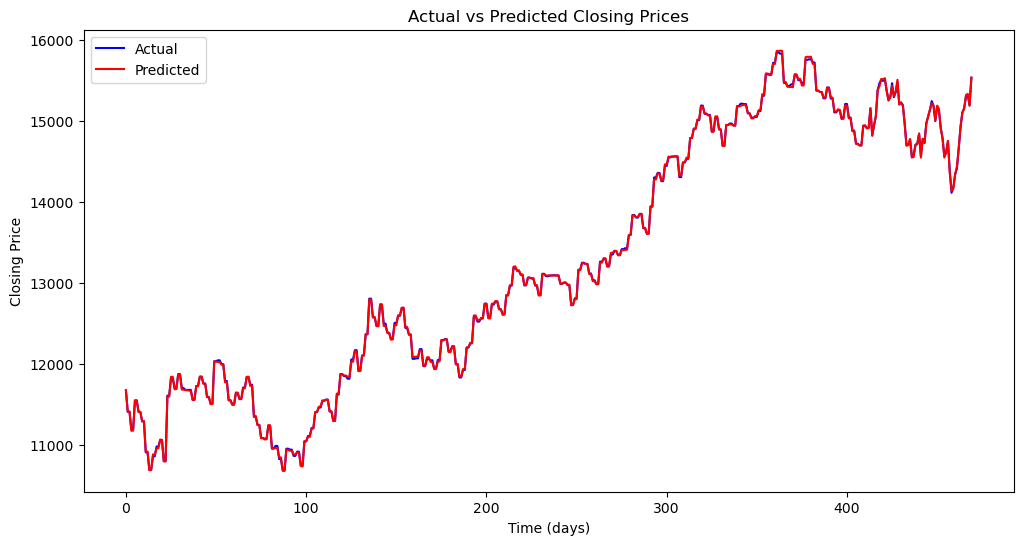

In [154]:
import matplotlib.pyplot as plt

# Assuming y_test is your actual values and y_pred is your model's predictions
# Ensure that y_test and y_pred are in the same format (e.g., both as NumPy arrays or both as Pandas series)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (days)')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


#### Doing Cross Validation

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Configure the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize model
model = RandomForestRegressor(random_state=0)

# Arrays to store scores
mse_scores = []
r2_scores = []

import numpy as np

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Replace NaN values with 0
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Display results
print("MSE scores per fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("R² scores per fold:", r2_scores)
print("Average R²:", np.mean(r2_scores))


MSE scores per fold: [3031773.2288908237, 4595334.08006681, 72817.74416628917, 380.0291597215838, 112.74683307750398]
Average MSE: 1540083.5658233447
R² scores per fold: [-0.9515926036837647, -2.12417024072974, 0.970645637538392, 0.9988193488477349, 0.9998705740567516]
Average R²: -0.02128545679412521


---
## ARIMA Model

In [155]:
X = features
y = values_ts['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)

In [157]:
train_size = 0.7  # 70% of the data for training
test_size = 0.3

split_index = int(len(X) * train_size)

# Split the data into training and testing sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [158]:
# Import ARIMA model.
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(endog=y_train.astype(float).dropna(), # endog = Y variable
             order = (0, 2, 0))

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [159]:
arima_0_2_0 = model.fit()

In [160]:
values_ts.tail()

DayOfWeek          Open          High           Low         Close  \
Date                                                                            
2023-11-06          1  15137.160156  15180.190430  15064.910156  15154.929688   
2023-11-07          2  15201.769531  15335.440430  15153.309570  15296.019531   
2023-11-08          3  15313.900391  15343.190430  15220.879883  15313.240234   
2023-11-09          4  15351.120117  15382.110352  15171.320313  15187.900391   
2023-11-10          5  15252.360352  15535.200195  15237.169922  15529.120117   

               Adj Close      Volume  OC Difference  HL Difference  \
Date                                                                 
2023-11-06  15154.929688  4345850000     -17.769532     115.280274   
2023-11-07  15296.019531  4354460000     -94.250000     182.130860   
2023-11-08  15313.240234  4685550000       0.660157     122.310547   
2023-11-09  15187.900391  5313970000     163.219726     210.790039   
2023-11-10  15529.120117  4722140000    -276.759765     298.030273   

            OC %Change  ...  first_diff_volume  first_diff_avg_volume_10_day  \
Date                    ...                                                    
2023-11-06    0.001174  ...       -572900000.0                           NaN   
2023-11-07    0.006200  ...          8610000.0                           NaN   
2023-11-08   -0.000043  ...        331090000.0                           NaN   
2023-11-09   -0.010632  ...        628420000.0                           NaN   
2023-11-10    0.018145  ...       -591830000.0                           NaN   

            first_diff_close_bracket  first_diff_short_ema  \
Date                                                         
2023-11-06                     100.0             44.020832   
2023-11-07                     100.0             41.944719   
2023-11-08                     100.0             23.918332   
2023-11-09                    -200.0             25.136083   
2023-11-10                     400.0             52.495342   

            first_diff_long_ema  first_diff_close_lag_1  \
Date                                                      
2023-11-06            26.085189              179.940429   
2023-11-07            23.736848               55.439454   
2023-11-08            14.348608              141.089843   
2023-11-09            14.118841               17.220703   
2023-11-10            25.275535             -125.339843   

            first_diff_close_lag_2  first_diff_close_lag_3  \
Date                                                         
2023-11-06              254.639649              255.129883   
2023-11-07              179.940429              254.639649   
2023-11-08               55.439454              179.940429   
2023-11-09              141.089843               55.439454   
2023-11-10               17.220703              141.089843   

            first_diff_close_lag_4  first_diff_close_lag_5  
Date                                                        
2023-11-06               74.270507              155.089844  
2023-11-07              255.129883               74.270507  
2023-11-08              254.639649              255.129883  
2023-11-09              179.940429              254.639649  
2023-11-10               55.439454              179.940429  

[5 rows x 46 columns]

In [161]:
y_test.head(10)

Date
2022-10-25    11669.990234
2022-10-26    11405.900391
2022-10-26    11405.900391
2022-10-27    11191.629883
2022-10-27    11191.629883
2022-10-28    11546.209961
2022-10-28    11546.209961
2022-10-31    11405.570313
2022-10-31    11405.570313
2022-11-01    11288.950195
Name: Close, dtype: float64

In [162]:
preds = arima_0_2_0.predict(start = datetime(2022,10,25), end = datetime(2023,11,10))


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

---
## VAR Model